In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:,[2,3]]
y = data.iloc[:,[4]].values
Y = np.ravel(y)

In [5]:
data.shape

(400, 5)

In [4]:
data.head().T

,0,1,2,3,4
User ID,15624510,15810944,15668575,15603246,15804002
Gender,Male,Male,Female,Female,Male
Age,19,35,26,27,19
EstimatedSalary,19000,20000,43000,57000,76000
Purchased,0,0,0,0,0


<AxesSubplot:xlabel='Purchased', ylabel='count'>

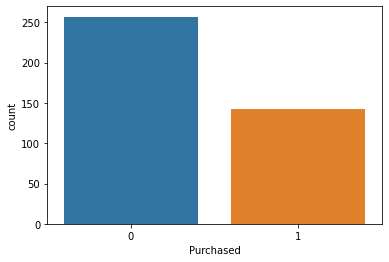

In [7]:
import seaborn as sns
sns.countplot(x = 'Purchased', data = data)

In [8]:
data.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
print('Size of X_train:', X_train.shape)
print('Size of X_test:', X_test.shape)
print('Size of Y_train:', Y_train.shape)
print('Size of Y_test:', X_test.shape)

Size of X_train: (320, 2)
Size of X_test: (80, 2)
Size of Y_train: (320, 1)
Size of Y_test: (80, 2)


In [14]:
X_train.head().T

,336,64,55,106,300
Age,58,59,24,26,58
EstimatedSalary,144000,83000,55000,35000,38000


In [15]:
X_train.describe()

,Age,EstimatedSalary
count,320.00000,320.000000
mean,38.21875,69928.125000
std,10.30304,34570.057299
min,18.00000,15000.000000
25%,30.00000,43000.000000
50%,38.00000,69500.000000
75%,46.00000,88000.000000
max,60.00000,150000.000000


In [16]:
# feature scaling - Z Score
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [17]:
a = pd.DataFrame(X_train)
a.describe()

,0,1
count,3.200000e+02,3.200000e+02
mean,1.179612e-17,2.844947e-17
std,1.001566e+00,1.001566e+00
min,-1.965480e+00,-1.591382e+00
25%,-7.989508e-01,-7.801636e-01
50%,-2.126485e-02,-1.240367e-02
75%,7.564211e-01,5.235797e-01
max,2.117372e+00,2.319848e+00


<AxesSubplot:>

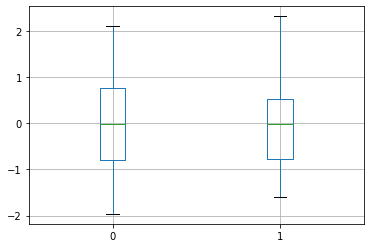

In [18]:
a.boxplot()

In [39]:
type(Y)
Y.ndim

1

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [30]:
pred_y = classifier.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred_y)

In [32]:
print(cm)

[[54  4]
 [ 1 21]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred_y))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.95      0.89        22

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80



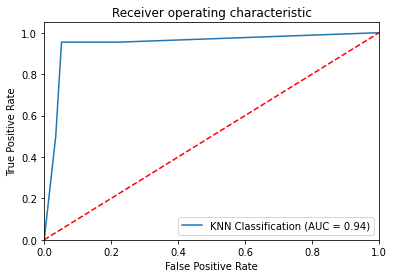

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Area_Under_Curve = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Classification (AUC = %0.2f)' % Area_Under_Curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()